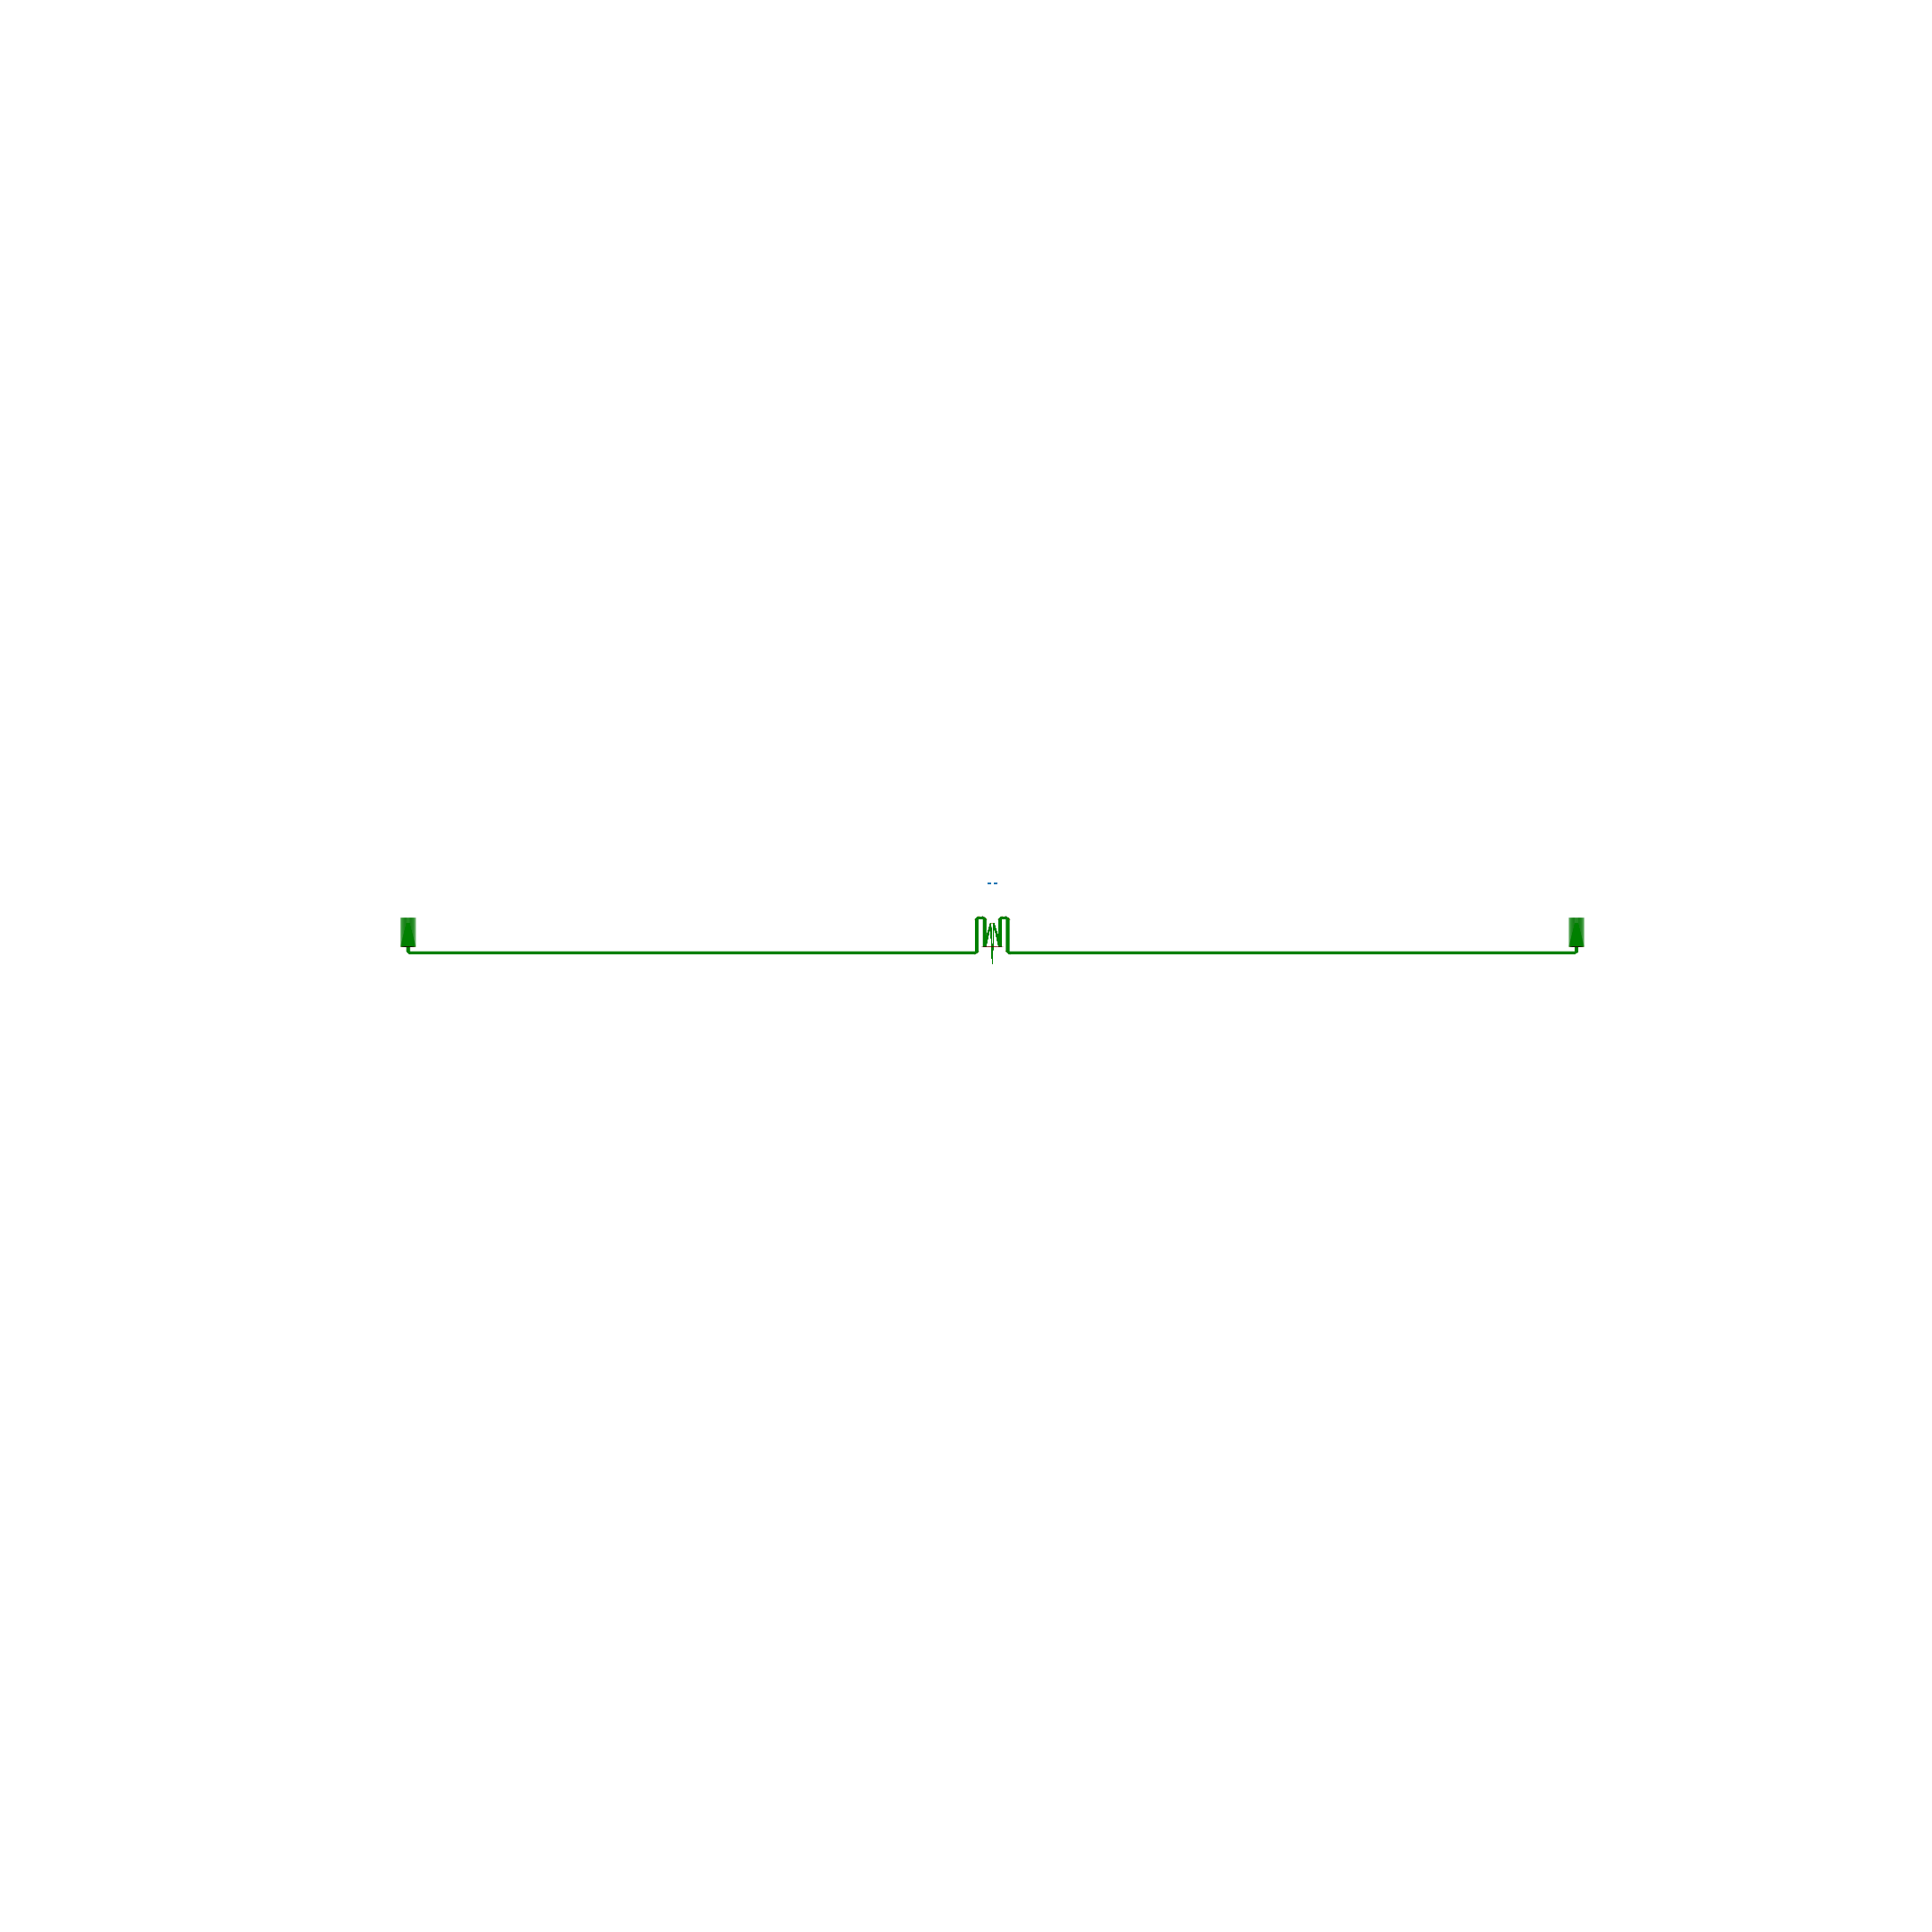

In [279]:
import pimms.optics as op
reload(op)
reload(op.lins)
reload(op.quat)
sim=op.SIM(init_b=150., detector_a=.15)
opn=op.OpticalPathNetwork(sim)
src=op.LightSource((0., np.deg2rad(0.), np.inf))
p,q=src(sim.get_entrance(), 1000, 1, sampling='uniform')
pt,mt=sim.trace_network(q,opn)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1)
sim.draw(raytrace=pt,axes=ax,draw_virtual=True,view_angles=(0,-90))
plt.show()

In [16]:
print(np.unique(mt[-1]))
m=np.bool_(mt[-1]==0)
np.max(pt[-1]['direction'][m,2])

[-1  0  4]


1.0000000000000002

Batch 1: 197007 rays traced on objects.
Batch 1: 197007 rays perturbed.
Batch 1: 5656 forwards rays traced before exit.
Batch 1: 5586 intersections solved, S-stats: 2.75E-08 (peak), 2.15E-09 (avg), 3.98E-09 (std).
Batch 1: 1.00E+00 degrees perturb, 6.01E-09 (hi), 7.95E-12 (lo).
Batch 1: 17 samplings collected.
Batch 2: 196982 rays traced on objects.
Batch 2: 196982 rays perturbed.
Batch 2: 54345 forwards rays traced before exit.
Batch 2: 53714 intersections solved, S-stats: 2.89E-08 (peak), 2.12E-09 (avg), 3.98E-09 (std).
Batch 2: 1.00E-01 degrees perturb, 6.09E-09 (hi), 7.22E-12 (lo).
Batch 2: 172 samplings collected.
Batch 3: 196874 rays traced on objects.
Batch 3: 196874 rays perturbed.
Batch 3: 196782 forwards rays traced before exit.
Batch 3: 189610 intersections solved, S-stats: 2.72E-08 (peak), 2.07E-10 (avg), 7.88E-10 (std).
Batch 3: 1.00E-02 degrees perturb, 1.57E-09 (hi), 3.49E-13 (lo).
Batch 3: 1455 samplings collected.
Batch 4: 196981 rays traced on objects.
Batch 4: 196981

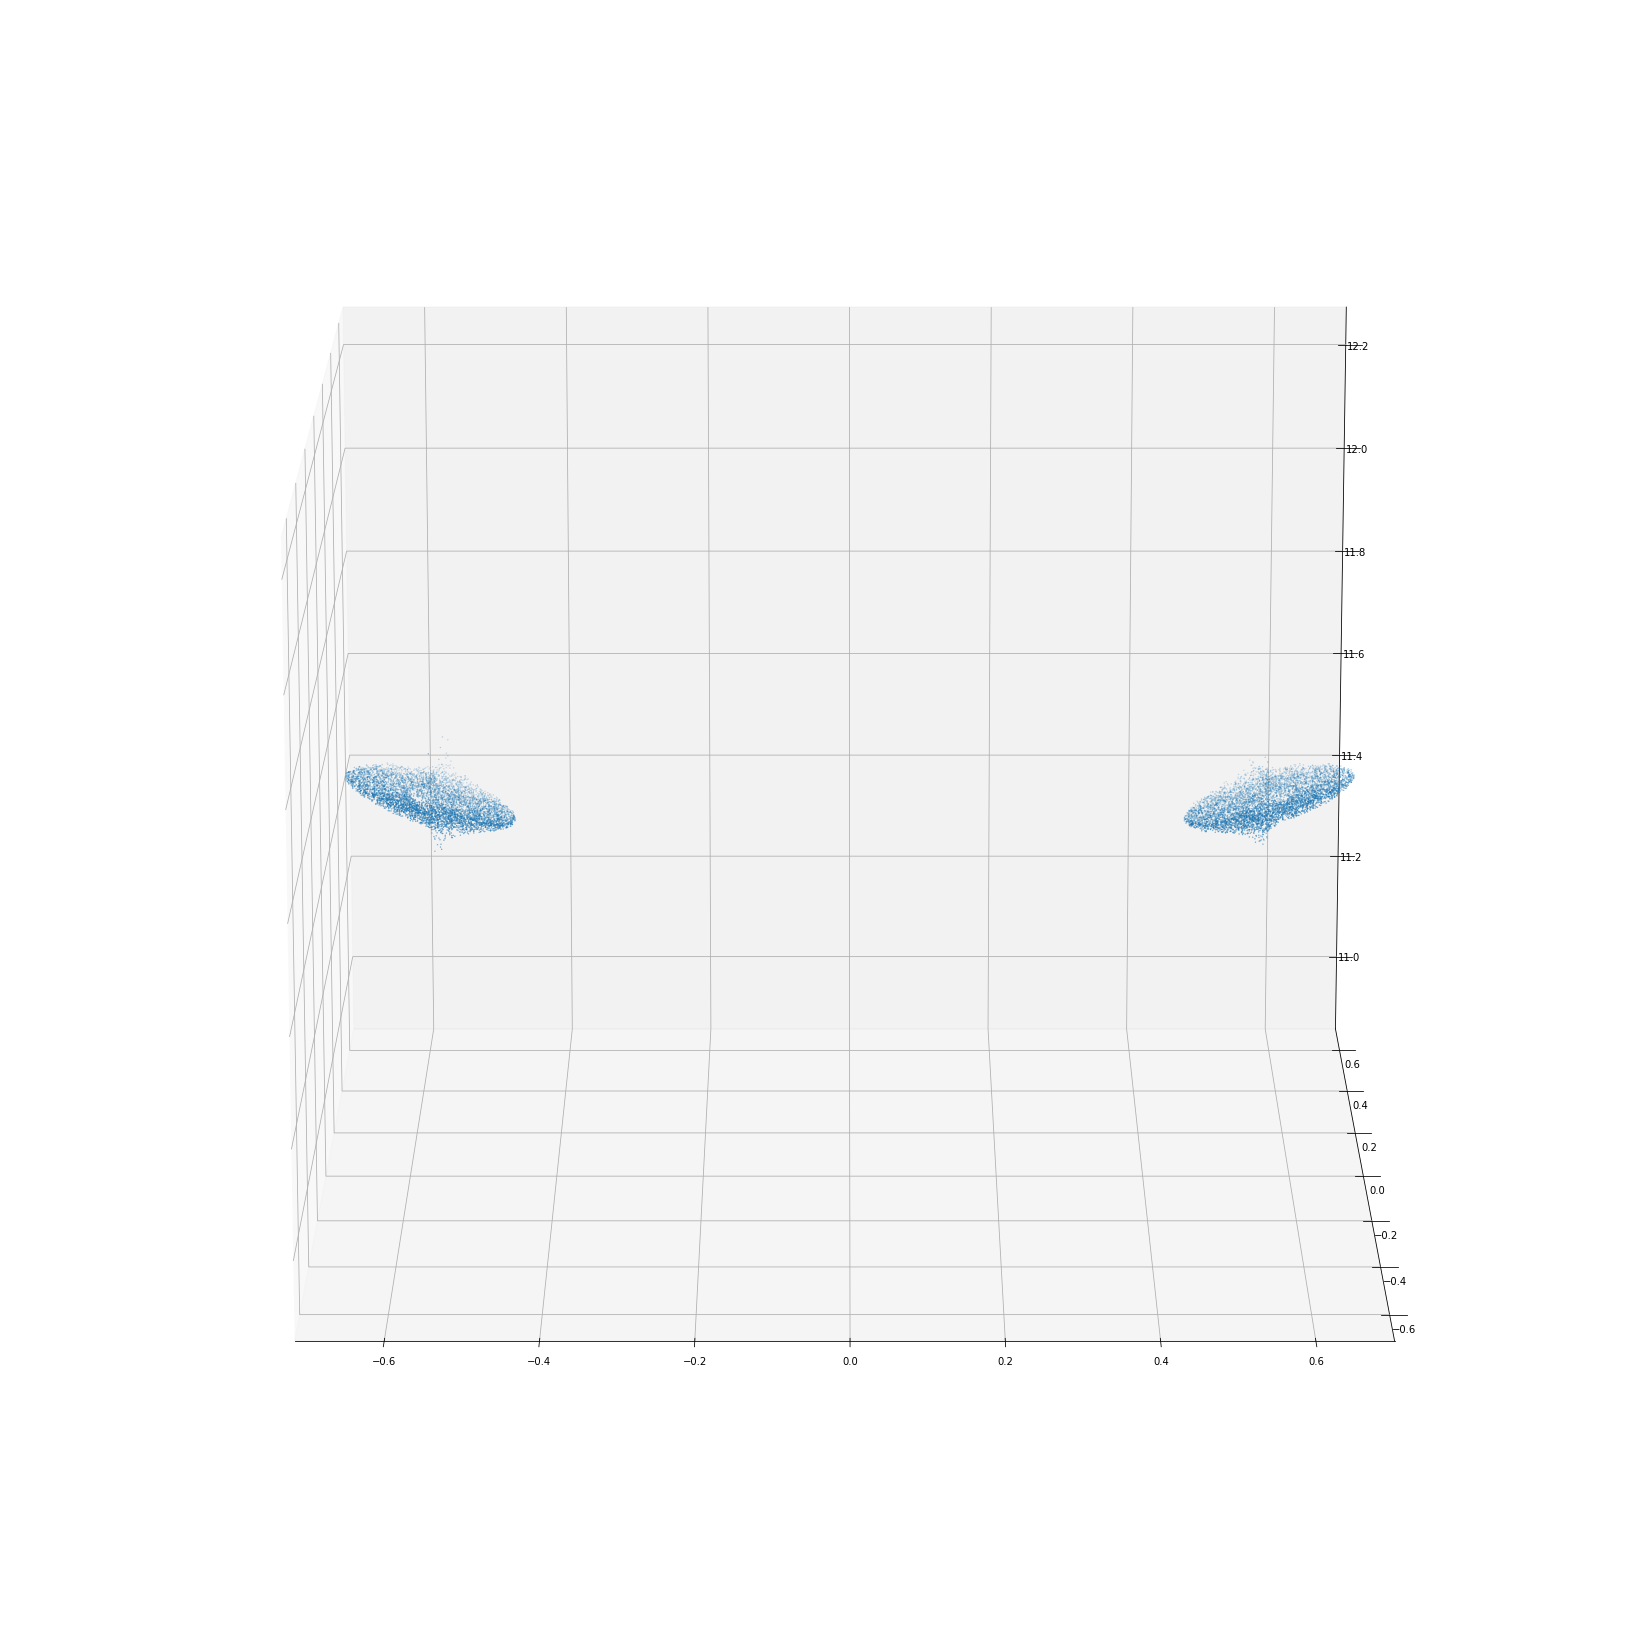

In [280]:
stops=opn.aperture_stop()
n=opn.find_image(stops,'exit',min_samplings=10000,batch_rays=100000,max_batches=100,verbose=True)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1)
extent=max(np.max(n[:,0])-np.min(n[:,0]), np.max(n[:,1])-np.min(n[:,1]), np.max(n[:,2])-np.min(n[:,2]))
ax.set_xlim([np.mean(n[:,0])-extent/2.,np.mean(n[:,0])+extent/2.])
ax.set_ylim([np.mean(n[:,1])-extent/2.,np.mean(n[:,1])+extent/2.])
ax.set_zlim([np.mean(n[:,2])-extent/2.,np.mean(n[:,2])+extent/2.])
ax.view_init(15,-90)

In [64]:
import pimms.optics as op
reload(op)
sim=op.SIM()
src=op.LightSource((0.,0.,np.inf))
opn=op.OpticalPathNetwork(sim)
p,q=src(sim.get_entrance(),100,1,sampling='crosshair')
%time pt0,mt0=sim.trace(q)
%time pt1,mt1=sim.trace_network(q,opn)
print(np.all(pt0==pt1))

CPU times: user 708 ms, sys: 239 ms, total: 947 ms
Wall time: 704 ms
CPU times: user 114 ms, sys: 28.7 ms, total: 143 ms
Wall time: 117 ms
True


In [65]:
pt,mt=sim.trace_network(q,opn,starts=sim.collectors[1].get_primaries(),stops=sim.get_detectors())

In [49]:
import pymath.linsolvers as lins
reload(lins)
r,s=lins.two_lines_intersection(pt[1]['position'],pt[1]['direction'],pt[2]['position'],pt[2]['direction'])
m=~np.isnan(s)
print(np.max(s[m]))

2.1316282072971027e-14


In [77]:
a=opn.aperture_stop()

In [79]:
nodes=[]
for obj in a:
    nodes += [node for node in opn.successors(obj)]

In [255]:
np.array([1.,2,3],dtype='float128')

array([1., 2., 3.], dtype=float128)

In [271]:
import numexpr as ne
ne.evaluate("sin(x)",local_dict={'x':np.empty((2,), dtype='float128')})

TypeError: Iterator operand 1 dtype could not be cast from dtype('float128') to dtype('float64') according to the rule 'safe'

In [267]:
np.random.rand?

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method
